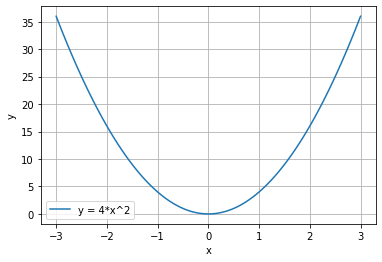

Iter:0, X:     2.0, X.grad:    16.0, loss:      16.0
Iter:1, X:1.840000033378601, X.grad:14.720000267028809, loss:13.542400360107422
Iter:2, X:1.6928000450134277, X.grad:13.542400360107422, loss:11.462287902832031
Iter:3, X:1.5573760271072388, X.grad:12.45900821685791, loss:9.701680183410645
Iter:4, X:1.432785987854004, X.grad:11.462287902832031, loss:8.211503028869629
Iter:5, X:1.3181631565093994, X.grad:10.545305252075195, loss:6.950216293334961
Iter:6, X:1.2127101421356201, X.grad:9.701681137084961, loss:5.882663726806641
Iter:7, X:1.1156933307647705, X.grad:8.925546646118164, loss:4.979086399078369
Iter:8, X:1.0264378786087036, X.grad:8.211503028869629, loss:4.214298725128174
Iter:9, X:0.9443228244781494, X.grad:7.554582595825195, loss:3.5669822692871094
Iter:10, X:0.8687769770622253, X.grad:6.950215816497803, loss:3.0190937519073486
Iter:11, X:0.7992748022079468, X.grad:6.394198417663574, loss:2.555360794067383
Iter:12, X:0.7353328466415405, X.grad:5.882662773132324, loss:2.162857

C:\Users\zhaoxinyang\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


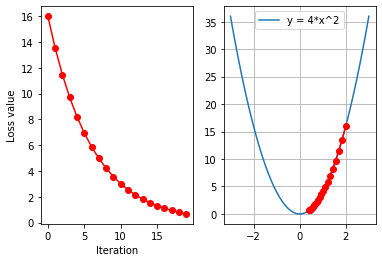

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)


def func(x_t):
    """
    y = (2x)^2 = 4*x^2      dy/dx = 8x
    """
    return torch.pow(2*x_t, 2)


# init
x = torch.tensor([2.], requires_grad=True)


# ------------------------------ plot data ------------------------------
# flag = 0
flag = 1
if flag:

    x_t = torch.linspace(-3, 3, 100)
    y = func(x_t)
    plt.plot(x_t.numpy(), y.numpy(), label="y = 4*x^2")
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


# ------------------------------ gradient descent ------------------------------
# flag = 0
flag = 1
if flag:
    iter_rec, loss_rec, x_rec = list(), list(), list()

    lr = 0.01    # /1. /.5 /.2 /.1 /.125
    max_iteration = 20   # /1. 4     /.5 4   /.2 20 200

    for i in range(max_iteration):

        y = func(x)
        y.backward()

        print("Iter:{}, X:{:8}, X.grad:{:8}, loss:{:10}".format(
            i, x.detach().numpy()[0], x.grad.detach().numpy()[0], y.item()))

        x_rec.append(x.item())

        x.data.sub_(lr * x.grad)    # x -= x.grad  数学表达式意义:  x = x - x.grad    # 0.5 0.2 0.1 0.125
        x.grad.zero_()

        iter_rec.append(i)
        loss_rec.append(y)

    plt.subplot(121).plot(iter_rec, loss_rec, '-ro')
    plt.xlabel("Iteration")
    plt.ylabel("Loss value")

    x_t = torch.linspace(-3, 3, 100)
    y = func(x_t)
    plt.subplot(122).plot(x_t.numpy(), y.numpy(), label="y = 4*x^2")
    plt.grid()
    y_rec = [func(torch.tensor(i)).item() for i in x_rec]
    plt.subplot(122).plot(x_rec, y_rec, '-ro')
    plt.legend()
    plt.show()

# ------------------------------ multi learning rate ------------------------------



[0.01, 0.03111111111111111, 0.052222222222222225, 0.07333333333333333, 0.09444444444444444, 0.11555555555555555, 0.1366666666666667, 0.1577777777777778, 0.1788888888888889, 0.2]
0
1
2
3
4
5
6
7
8
9


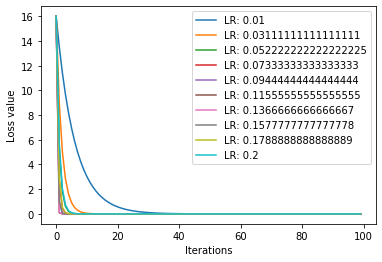

In [12]:
# flag = 0
flag = 1
if flag:
    iteration = 100
    num_lr = 10
    lr_min, lr_max = 0.01, 0.2  # .5 .3 .2

    lr_list = np.linspace(lr_min, lr_max, num=num_lr).tolist()
    print(lr_list)
    loss_rec = [[] for l in range(len(lr_list))]
    iter_rec = list()

    for i, lr in enumerate(lr_list):
        x = torch.tensor([2.], requires_grad=True)
        for iter in range(iteration):

            y = func(x)
            y.backward()
            x.data.sub_(lr * x.grad)  # x.data -= x.grad
            x.grad.zero_()

            loss_rec[i].append(y.item())
            

    for i, loss_r in enumerate(loss_rec):
        print(i)
        
        plt.plot(range(len(loss_r)), loss_r, label="LR: {}".format(lr_list[i]))
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Loss value')
    plt.show()
